<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Juypter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Numerical methods: 3. Roots
## Bisection method
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we allpy the **bisection method** to find roots of the function $f(x)$ with one variable $x$,
defined over the interval $[a,b]$. We base our search on the bracketing algorithm introduced before ...

We first import some libraries...

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Function
Next, we define the function, which we would like to examine:

In [2]:
def root_f(x):
    y = np.sin(x)
    return y

## Bracketing algorithm
As we have introduced the **bracketing algorithm** before, we simply run it for the defined function and interval.

In [3]:
def root_bracket (f,a,b,n):
    '''
    #-----------------------------------------------------------------------
    # Given a function fx defined on the intervall [a,b], subdivide the
    # intervall in n equally spaced segments, and search for zero crossings
    # of the function. nb is input as the maximum number of roots searched,
    # it is reset to the number of bracketing pairs found, xb1(1:nb),xb2(1:nb).
    # (c) Numerical recipes 
    #-----------------------------------------------------------------------
    '''
    nb  = 0
    xb1 = np.zeros([0])
    xb2 = np.zeros([0])
    x   = a
    dx  = (b-a)/n
    fa  = f(x)
    for i in np.linspace(1,n,n,dtype=int):
        x = x + dx
        fb = f(x)
        if (fa*fb <= 0):
            nb = nb + 1
            xb1 = np.append(xb1,x-dx)
            xb2 = np.append(xb2,x)
        fa = fb
    return xb1,xb2,nb 

In [4]:
#-----------------------------------------------------------------------
# define interval and number of segments
#-----------------------------------------------------------------------
a   = -0.1
b   = 2.1*np.pi
n   = 10
nb  = 0
#-----------------------------------------------------------------------
# call bracketing algorithm
#-----------------------------------------------------------------------
[xb1,xb2,nb] = root_bracket(root_f,a,b,n)
print(xb1,xb2,nb)

[-0.1         2.57893783  5.92761012] [0.56973446 3.24867229 6.59734457] 3


## Bisection method
Next, we define the **bisection method** as a function.
1. We first hand down an interval $[a,b]$ and a tolerance level $tol$.
2. Then a maximum number of iterations, $nmax$, is set, and the function is calculated
at the initial end points of the interval, $f(a)$ and $f(b)$.
3. We test, if there is really a potential root by checking the bracketing condition $f(a) \cdot f(b) <0$.
4. We determine, if the functional value $f(a)$ at the left side of the interval is positive or netative.
If positive, the search direction has to be from right to left...
5. We iterate over the maximum number of iterations $nmax$, set $a$ and $b$, calculate the mid point $x0$
and its functional value $f(x0)$.
6. Then the accuracy of the procedure is tested, using different criteria. If one of the defined
criteria is met, the function returns the estimate of the root. Otherwise, it stops and reports an error.

In [5]:
def root_bisection (f,a,b,tol):
    '''
    #-----------------------------------------------------------------------
    # Given a function fx defined on the interval [a,b], which contains
    # a possible root (bracketing!), the root is found by halving the
    # interval, until the desired accuracy +/-acc is achieved, otherwise
    # the algorithm quits.
    # (c) modified from Numerical recipes
    #-----------------------------------------------------------------------
    '''
    nmax = 20
    fa = f(a)
    fb = f(b)
    # exit, when root is not bracketed
    if (fa*fb > 0):
        print ('root_bisection: root not bracketed')
        exit()
    # orient search such that f>0 lies at x+dx
    if (fa <= 0.):
        root_bisection = a
        dx            = b-a
    else:
        root_bisection = b
        dx            = a-b
    # find root, loop over nmax, and exit, if f=0 or dx<tol
    for i in np.arange(1,nmax):
        a = root_bisection
        b = root_bisection+dx
        dx   = dx*0.5
        x0   = root_bisection + dx
        fx0  = f(x0)
       #print (i,a,b,dx,x0,fx0)
        if (fx0 <= 0.):
            root_bisection = x0
        if (np.abs(dx) <= tol or fx0 == 0.):
            return root_bisection
    exit ('root_bisection: too many iterations in root_bisection')

## Test the algorithm
Next, we test our **bisection method** with the function $f(x)=\sin(x)$, given in the interval $[0,2\pi]$,
by looping over the bracketed intervals:

In [6]:
x0 = np.empty(nb)
y0 = np.empty(nb)
for i in range(nb):
    x0[i] = root_bisection(root_f,xb1[i],xb2[i],tol=0.0001)
    y0[i] = root_f(x0[i])
    print ("%5i %10.5f %10.5f" % (i,x0[i],y0[i]))

    0   -0.00001   -0.00001
    1    3.14166   -0.00006
    2    6.28316   -0.00002


Plot the function and the intervals with sign change found:

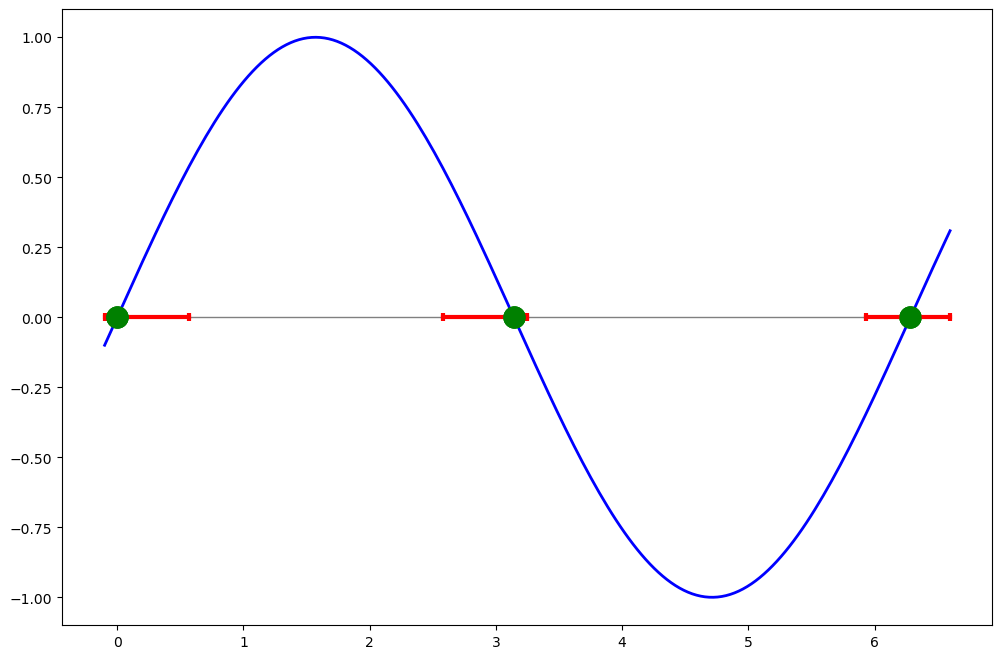

In [7]:
x=np.linspace(a,b,201)
y=root_f(x)

plt.figure(figsize=(12,8))
plt.plot([a,b],[0,0],linewidth=1,color='gray')
plt.plot(x,y,linewidth=2,color='blue')
for i in range(nb):
    plt.plot([xb1[i],xb2[i]],[0,0],linewidth=3,color='red')
    plt.plot(xb1[i],[0],marker='|',markeredgewidth=3,color='red')
    plt.plot(xb2[i],[0],marker='|',markeredgewidth=3,color='red')
    plt.plot(x0,y0,marker='o',linewidth=0,markersize=15,color='green')


## Use with polynomial function ...

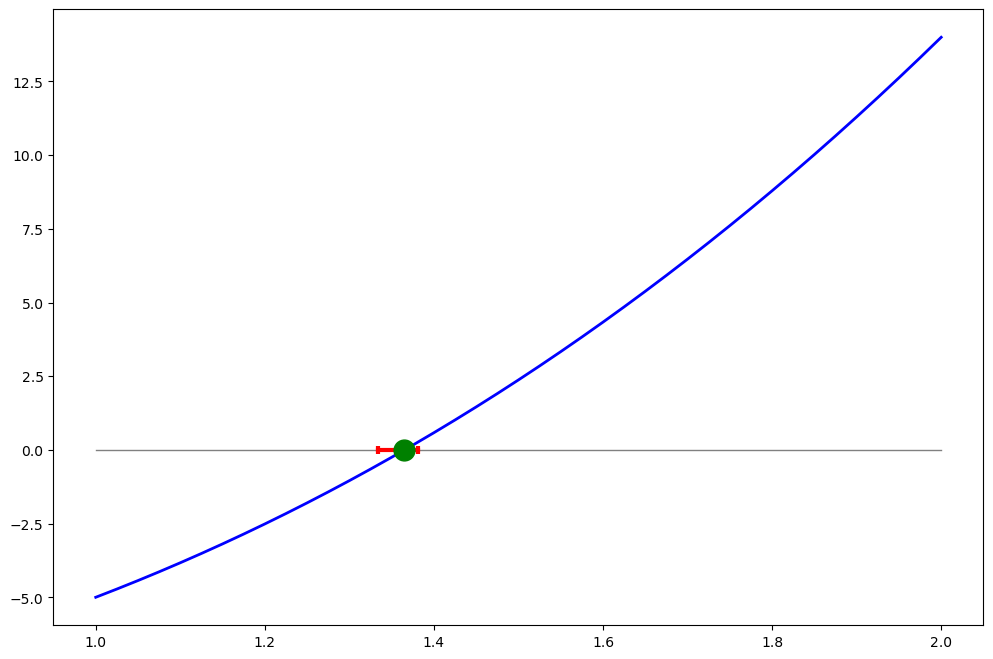

In [8]:
# define function
def root_f(x):
    y = x**3 + 4*x**2 - 10
    return y

# define interval and sub-division
a   = 1.
b   = 2.
n   = 21
nb  = 0

# find possible intervals
[xb1,xb2,nb] = root_bracket(root_f,a,b,n)

# run bisection method
x0 = np.empty(nb)
y0 = np.empty(nb)
for i in range(nb):
    x0[i] = root_bisection(root_f,xb1[i],xb2[i],tol=0.0005)
    y0[i] = root_f(x0[i])

# plot
x=np.linspace(a,b,201)
y=root_f(x)
plt.figure(figsize=(12,8))
#plt.ylim([-2,2])
plt.plot([a,b],[0,0],linewidth=1,color='gray')
plt.plot(x,y,linewidth=2,color='blue')
for i in range(len(xb1)):
    plt.plot([xb1[i],xb2[i]],[0,0],linewidth=3,color='red')
    plt.plot(xb1[i],[0],marker='|',markeredgewidth=3,color='red')
    plt.plot(xb2[i],[0],marker='|',markeredgewidth=3,color='red')
    plt.plot(x0,y0,marker='o',linewidth=0,markersize=15,color='green')

----
## Use with weird function

$$
\begin{array}{rcl}
f(x) &=& x \sin\left(\frac{1}{x}\right) \\
f'(x) &=& \sin\left(\frac{1}{x}\right) - \frac{1}{x} \cos\left(\frac{1}{x}\right)
\end{array}
$$

In [9]:
import warnings
warnings.filterwarnings('ignore')

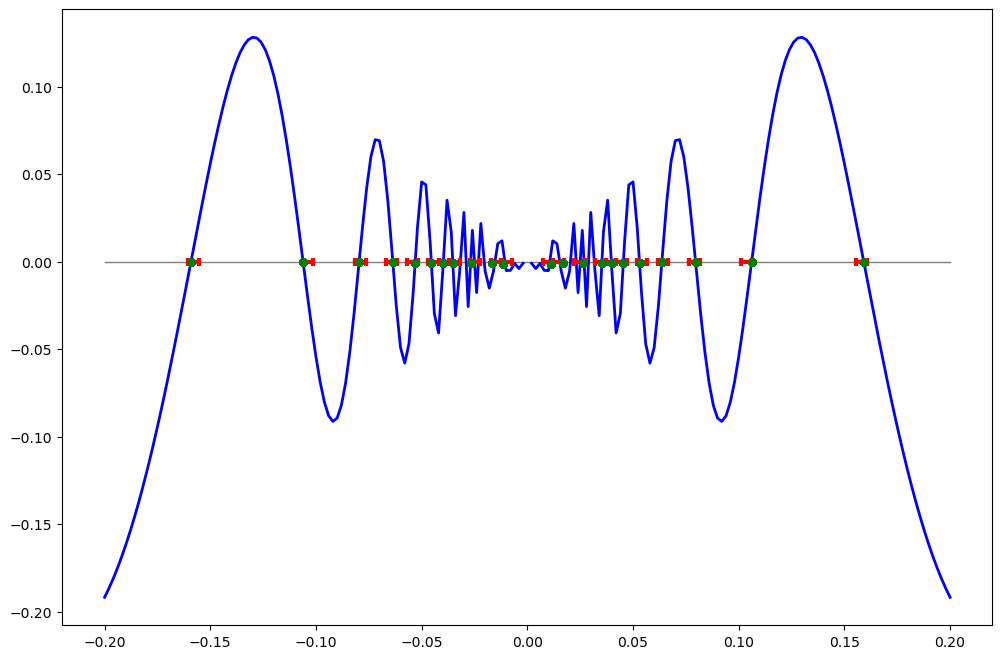

In [10]:
# define function
def root_f(x):
    y = x*np.sin(1/x)
    return y

# define interval and sub-division
a   = -0.2
b   =  0.2
n   = 81
nb  = 0

# find possible intervals
[xb1,xb2,nb] = root_bracket(root_f,a,b,n)

# run bisection method
x0 = np.empty(nb)
y0 = np.empty(nb)
for i in range(nb):
    x0[i] = root_bisection(root_f,xb1[i],xb2[i],tol=0.00005)
    y0[i] = root_f(x0[i])

# plot
x=np.linspace(a,b,201)
y=root_f(x)
plt.figure(figsize=(12,8))
#plt.ylim([-2,2])
plt.plot([a,b],[0,0],linewidth=1,color='gray')
plt.plot(x,y,linewidth=2,color='blue')
for i in range(len(xb1)):
    plt.plot([xb1[i],xb2[i]],[0,0],linewidth=3,color='red')
    plt.plot(xb1[i],[0],marker='|',markeredgewidth=3,color='red')
    plt.plot(xb2[i],[0],marker='|',markeredgewidth=3,color='red')
    plt.plot(x0,y0,marker='o',linewidth=0,markersize=5,color='green')

----
[next >](Numerics_lab03_secant.ipynb)